# Определение перспективного тарифа для телеком-компании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Создание-объединенной-таблицы" data-toc-modified-id="Создание-объединенной-таблицы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание объединенной таблицы</a></span></li><li><span><a href="#Анализ-данных-о-поведении-и-расходах-клиентов-Мегалайн" data-toc-modified-id="Анализ-данных-о-поведении-и-расходах-клиентов-Мегалайн-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных о поведении и расходах клиентов Мегалайн</a></span></li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

По условию проекта, я - аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В моем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

###  Изучение данных из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [2]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls['month'] = calls['call_date'].dt.month
calls.sample(15)

,id,call_date,duration,user_id,month
19517,1053_138,2018-12-03,0,1053,12
92749,1233_94,2018-10-14,11,1233,10
181605,1453_797,2018-07-19,6,1453,7
189813,1467_80,2018-11-29,9,1467,11
186401,1460_319,2018-07-06,12,1460,7
40458,1099_831,2018-05-15,5,1099,5
164307,1404_144,2018-05-21,10,1404,5
71975,1179_247,2018-11-15,2,1179,11
143694,1363_606,2018-11-16,7,1363,11
108514,1280_433,2018-09-30,0,1280,9


   
   В таблице с данными о звонках клиентов "Мегалайн" округлили длительность звонков, по правилам компании, в большую сторону до минут. Поправили формат даты в столбце "__Call_date__", и добавили столбец со значением месяца "__Month__".
   
   

In [3]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') 
internet['month'] = internet['session_date'].dt.month
internet.sample(15)

,Unnamed: 0,id,mb_used,session_date,user_id,month
66645,66645,1227_242,0.00,2018-07-09,1227,7
107209,107209,1363_255,646.58,2018-05-04,1363,5
57826,57826,1193_365,133.76,2018-11-02,1193,11
41039,41039,1144_199,0.00,2018-07-29,1144,7
35735,35735,1124_115,369.62,2018-11-20,1124,11
94797,94797,1321_61,307.84,2018-07-20,1321,7
50114,50114,1172_396,702.54,2018-12-14,1172,12
71754,71754,1242_9,502.98,2018-12-17,1242,12
32930,32930,1115_133,252.96,2018-12-14,1115,12
128291,128291,1429_449,269.25,2018-06-21,1429,6



В таблице с данными о потраченных Мегабайтах интернет-траффика клиентов "Мегалайн" поправили формат даты в столбце "__session_date__", и добавили столбец со значением месяца "__Month__".


In [4]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
messages.info()
messages.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,month
18257,1080_203,2018-10-17,1080,10
101132,1414_76,2018-07-18,1414,7
73283,1310_152,2018-08-28,1310,8
101570,1415_146,2018-07-22,1415,7
87806,1366_65,2018-12-04,1366,12
81307,1341_161,2018-06-27,1341,6
20836,1089_839,2018-11-27,1089,11
59730,1262_221,2018-05-01,1262,5
118040,1478_392,2018-10-16,1478,10
79419,1332_39,2018-08-23,1332,8


В таблице с данными о сообщениях клиентов "Мегалайн" поправили формат даты в столбце "__message_date__", и добавили столбец со значением месяца "__Month__".

In [5]:
tariffs.info()

tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] /1024 
tariffs['gb_per_month_included'] = tariffs['gb_per_month_included'].astype(int)
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


В таблице с данными о тарифах "Мегалайн" перевели значения входящих в тариф бесплатных Мегабайт в Гигабайты (столбец "__gb_per_month_included__" и перевели данные в тип __int__.

In [6]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В таблице с данными о клиентах "Мегалайн" поправили формат даты в столбцах "__reg_date__" и "__churn_date__".

### Создание объединенной таблицы 
Создадим общую таблицу с количеством сделанных звонков, израсходованных минут разговора, отправленных сообщений и объема израсходованного интернет-трафика по месяцам.

In [7]:
calls_month = calls.pivot_table(
    index = ['user_id', 'month'], 
    values = 'duration', 
    aggfunc = ['count','sum']
)
calls_month.columns = [ 'calls_count', 'minutes_spent']
calls_month


calls_count  minutes_spent
user_id month                            
1000    5               22            159
        6               43            172
        7               47            340
        8               52            408
        9               58            466
...                    ...            ...
1498    10              41            247
1499    9                9             70
        10              68            449
        11              74            612
        12              69            492

[3174 rows x 2 columns]

In [8]:
messages_month = messages.pivot_table(
    index = ['user_id', 'month'], 
    values = 'id', 
    aggfunc = ['count']
)
messages_month.columns = [ 'message_count']
messages_month

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

In [9]:
internet_month = internet.pivot_table(
    index = ['user_id', 'month'], 
    values = 'mb_used', 
    aggfunc = ['sum']
)
internet_month.columns = ['traffic_mb']

internet_month['traffic_gb'] = np.ceil(internet_month['traffic_mb'] / 1024)

internet_month

traffic_mb  traffic_gb
user_id month                        
1000    5         2253.49         3.0
        6        23233.77        23.0
        7        14003.64        14.0
        8        14055.93        14.0
        9        14568.91        15.0
...                   ...         ...
1498    10       20579.36        21.0
1499    9         1845.75         2.0
        10       17788.51        18.0
        11       17963.31        18.0
        12       13055.58        13.0

[3203 rows x 2 columns]

In [10]:
calls_masseges = calls_month.merge(messages_month, on=['user_id', 'month'], how='left')

calls_masseges_internet = calls_masseges.merge(internet_month, on=['user_id', 'month'], how='right')

for user in calls_masseges_internet.index:
    calls_masseges_internet.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

total_pivot = calls_masseges_internet

total_pivot.fillna(0)

total_pivot

calls_count  minutes_spent  message_count  traffic_mb  \
user_id month                                                          
1000    5             22.0          159.0           22.0     2253.49   
        6             43.0          172.0           60.0    23233.77   
        7             47.0          340.0           75.0    14003.64   
        8             52.0          408.0           81.0    14055.93   
        9             58.0          466.0           57.0    14568.91   
...                    ...            ...            ...         ...   
1489    8              NaN            NaN            NaN    11050.56   
        9              NaN            NaN            NaN    17206.30   
        10             NaN            NaN            NaN    19559.44   
        11             NaN            NaN            NaN    17491.56   
        12             NaN            NaN            NaN    17322.51   

               traffic_gb tariff  
user_id month                     
1000    5             3.0  ultra  
        6            23.0  ultra  
        7            14.0  ultra  
        8            14.0  ultra  
        9            15.0  ultra  
...                   ...    ...  
1489    8            11.0  smart  
        9            17.0  smart  
        10           20.0  smart  
        11           18.0  smart  
        12           17.0  smart  

[3203 rows x 6 columns]

Добавим в сводную таблицу столбец "__total_spent__" с количеством потраченных денежных средств для пользователей по месяцам, с учетом условий тарифов. Потраченные денежные средства посчитаем при помощи функции с данными из тарифа.
    

In [11]:
def profit(row):
    if row['tariff'] == 'smart':
        if row['message_count'] > 50:
            messages_over = (row['message_count'] - 50)*3
        else:
            messages_over = 0
        if row['minutes_spent'] > 500:
            calls_over = (row['minutes_spent'] - 500)*3
        else:
            calls_over = 0
        if row['traffic_gb'] > 15:
            traffic_over_gb = (row['traffic_gb'] - 15)*200
        else:
            traffic_over_gb = 0
        total_spent = messages_over + calls_over + traffic_over_gb + 550
    if row['tariff'] == 'ultra':
        if row['message_count'] > 1000:
            messages_over = (row['message_count'] - 1000)*1
        else:
            messages_over = 0
        if row['minutes_spent'] > 3000:
            calls_over = (row['minutes_spent'] - 3000)*1
        else:
            calls_over = 0
        if row['traffic_gb'] > 30:
            traffic_over_gb = (row['traffic_gb'] - 30)*150
        else:
            traffic_over_gb = 0
        total_spent = messages_over + calls_over + traffic_over_gb + 1950
    return total_spent
 
total_pivot['total_spent'] = total_pivot.apply(profit, axis=1)
total_pivot

calls_count  minutes_spent  message_count  traffic_mb  \
user_id month                                                          
1000    5             22.0          159.0           22.0     2253.49   
        6             43.0          172.0           60.0    23233.77   
        7             47.0          340.0           75.0    14003.64   
        8             52.0          408.0           81.0    14055.93   
        9             58.0          466.0           57.0    14568.91   
...                    ...            ...            ...         ...   
1489    8              NaN            NaN            NaN    11050.56   
        9              NaN            NaN            NaN    17206.30   
        10             NaN            NaN            NaN    19559.44   
        11             NaN            NaN            NaN    17491.56   
        12             NaN            NaN            NaN    17322.51   

               traffic_gb tariff  total_spent  
user_id month                                  
1000    5             3.0  ultra       1950.0  
        6            23.0  ultra       1950.0  
        7            14.0  ultra       1950.0  
        8            14.0  ultra       1950.0  
        9            15.0  ultra       1950.0  
...                   ...    ...          ...  
1489    8            11.0  smart        550.0  
        9            17.0  smart        950.0  
        10           20.0  smart       1550.0  
        11           18.0  smart       1150.0  
        12           17.0  smart        950.0  

[3203 rows x 7 columns]

В итоге получаем таблицу "__total_pivot__" со значениями количества звонков ("__colls_count__"), потраченных минут ("__minutes_spent__"), количества сообщений ("__message_count__"), количества израсходованных Гигабайт интернет-траффика ("__traffic_gb__") и потраченных средств ("__total_spent__") каждого пользователя по месяцам, с указанием его тарифного плана.

### Анализ данных о поведении и расходах клиентов Мегалайн

___Тариф "Смарт"___

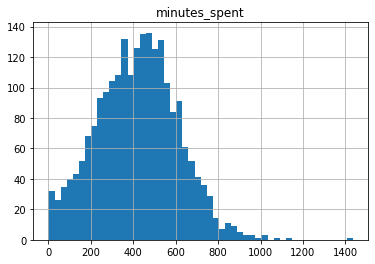

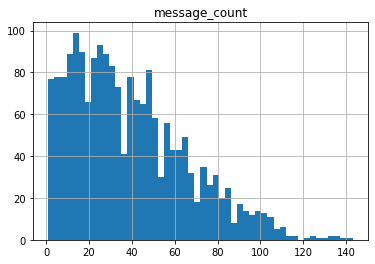

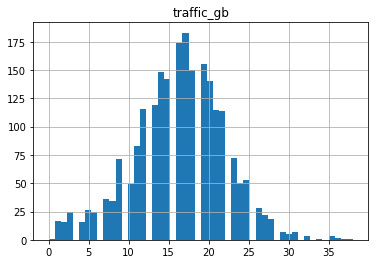

In [12]:
smart = total_pivot.query('tariff == "smart"')

columns = ['minutes_spent', 'message_count', 'traffic_gb']

for i in columns:
    smart[i].hist(bins=50)
    plt.title(i)
    plt.show()


In [13]:
variance_smart_calls = np.var(smart['minutes_spent'], ddof=1)

variance_smart_message = np.var(smart['message_count'], ddof=1)

variance_smart_internet = np.var(smart['traffic_gb'], ddof=1)

variance_smart_calls, variance_smart_message, variance_smart_internet

(35798.97361633957, 718.8036193391554, 32.92375582354312)

In [14]:
smart[['minutes_spent', 'message_count', 'traffic_gb', 'total_spent']].describe()

,minutes_spent,message_count,traffic_gb,total_spent
count,2222.000000,1915.000000,2228.000000,2228.000000
mean,419.229073,38.767102,16.336176,1290.305655
std,189.206167,26.810513,5.737923,818.437830
min,0.000000,1.000000,0.000000,550.000000
25%,285.000000,17.000000,13.000000,550.000000
50%,423.000000,34.000000,17.000000,1026.500000
75%,545.750000,55.000000,20.000000,1750.000000
max,1435.000000,143.000000,38.000000,6770.000000


Клиенты с тарифом "Смарт" в среднем в месяц тратят 419 минуту на звонки, что немного меньше, чем входит в тариф (500 минту), при СКО 189 и дисперсии 35798. По гистограмме видно, что распределение нормальное. Сообщений в среднем отправляют 39, что тоже входит в рамки тарифного плана (50 бесплатных сообщений), дисперсия 718,8, СКО 26,8. По гистограмме видно, что распределение Пуассона. Среднее количество потраченных Гигабайт интернет-трафика 16, что не сильно выше тарифного лимита (15 Гб), при СКО 5,7 и дисперсии 32,9. Распределение на гистограмме нормальное. В среднем клиент тарифа "Смарт" переплачивает больше, чем в 2 раза (1290 рублей вместо 550 рублей).

___Тариф "Ультра"___

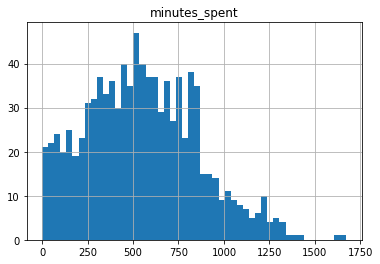

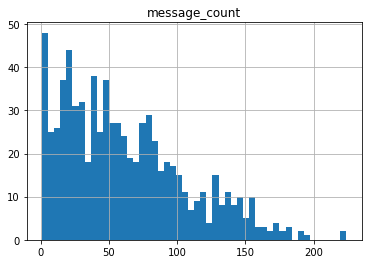

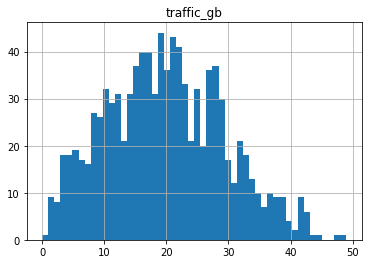

In [15]:
ultra = total_pivot.query('tariff == "ultra"')

columns = ['minutes_spent', 'message_count', 'traffic_gb']

for i in columns:
    ultra[i].hist(bins=50)
    plt.title(i)
    plt.show()


In [16]:
variance_ultra_calls = np.var(ultra['minutes_spent'], ddof=1)

variance_ultra_message = np.var(ultra['message_count'], ddof=1)

variance_ultra_internet = np.var(ultra['traffic_gb'], ddof=1)

variance_ultra_calls, variance_ultra_message, variance_ultra_internet

(94015.42736789744, 2008.5500113324078, 94.14673405991682)

In [17]:
ultra[['minutes_spent', 'message_count', 'traffic_gb', 'total_spent']].describe()

,minutes_spent,message_count,traffic_gb,total_spent
count,941.000000,752.000000,975.000000,975.000000
mean,548.890542,61.640957,19.694359,2071.384615
std,306.619353,44.816850,9.702924,377.915268
min,0.000000,1.000000,0.000000,1950.000000
25%,315.000000,25.000000,12.000000,1950.000000
50%,531.000000,53.000000,19.000000,1950.000000
75%,760.000000,89.000000,27.000000,1950.000000
max,1673.000000,224.000000,49.000000,4800.000000


In [18]:
total_pivot.pivot_table(index='tariff',  
                 values=['minutes_spent', 'message_count', 'traffic_gb', 'total_spent'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

Клиенты с тарифом "Ультра" в среднем в месяц тратят 548 минут на звонки, что сильно меньше, чем входит в тариф (3000 минут), при СКО 306,62 и дисперсии 94015.43. По гистограмме видно, что распределение нормальное. Сообщений в среднем отправляют 62, что тоже сильно меньше лимита тарифного плана (1000 бесплатных сообщений), дисперсия 2008.55, СКО 44,8. По гистограмме видно, что распределение Пуассона. Среднее количество потраченных Гигабайт интернет-трафика 19,69, что ниже тарифного лимита (30 Гб), при СКО 9,70 и дисперсии 94,15. Распределение на гистограмме нормальное. В среднем клиенты тарифа "Ультра" платят больше абонентской платы (2071 рублей вместо 1950 рублей). Так как лимиты по звонкам и сообщениям никто не превышает, перерасход интернет-трафика является причиной переплат клиентов.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


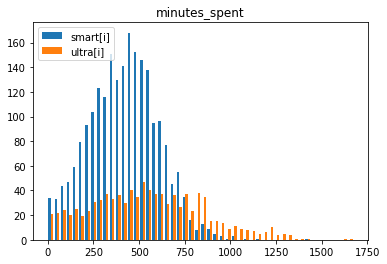

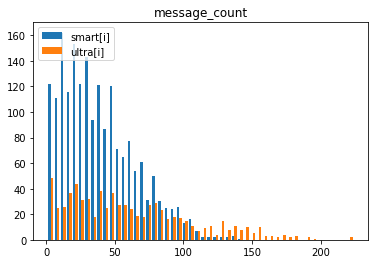

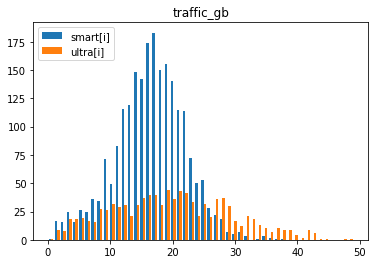

In [19]:
columns = ['minutes_spent', 'message_count', 'traffic_gb']

for i in columns:
    plt.hist([smart[i], ultra[i]], bins=50, label=['smart[i]', 'ultra[i]'])
    plt.title(i)
    plt.legend(loc='upper left')
    plt.show()


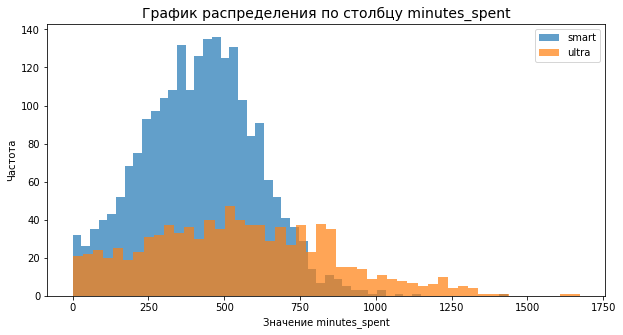

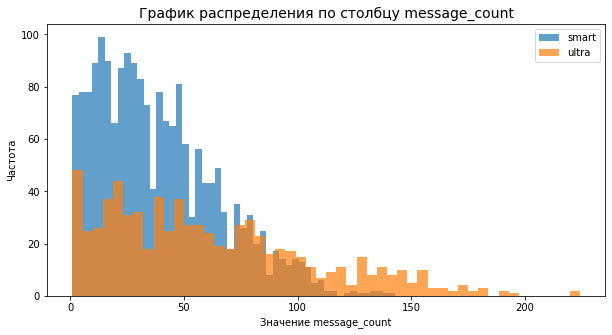

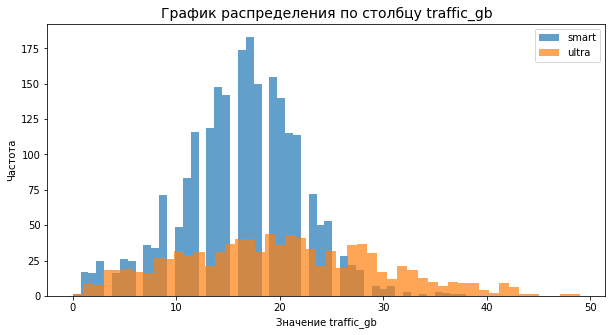

In [20]:
for column in columns:
    fig = plt.figure(figsize=(10, 5))
    plt.hist(total_pivot[total_pivot['tariff'] == 'smart'][column], bins=50, label='smart', alpha=0.7)
    plt.hist(total_pivot[total_pivot['tariff'] == 'ultra'][column], bins=50, label='ultra', alpha=0.7)
    plt.ylabel('Частота')
    plt.xlabel(f'Значение {column}')
    plt.title(f'График распределения по столбцу {column}', fontsize=14)
    plt.legend()
    plt.show()

   ### Проверка гипотезы
        
   Проверим H0 гипотизу: средняя выручка от клиентов тарифов Смарт и Ультра одинакова. Альтернативная гипотеза (H1): средние выручки от клиентов тарифов Смарт и Ультра не равны Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Так как дисперсии у нас разные, то параметр equal_var = False. Возьмем критический уровень значимости 5%.

In [21]:
results = st.ttest_ind(smart['total_spent'], ultra['total_spent'], equal_var = False)

print('p-значение:', results.pvalue)
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.22403940028982e-249
Отвергаем нулевую гипотезу


Вероятность того, что средняя выручка от клиентов тарифов Смарт и Ультра одинакова, слишком мала, поэтому отвргеам нулевую гипотезу.

  Проверим H0 гипотизу: средняя выручка от клиентов из Москвы и регионов одинакова. Альтернативная H1 гипотеза: выручка от клиентов из Москвы и регионов различается. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Возьмем критический уровень значимости 4%.

In [22]:
for user in total_pivot.index:
    total_pivot.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

moscow_users = total_pivot.query('city == "Москва"')
region_users = total_pivot.query('city != "Москва"')


results = st.ttest_ind(moscow_users['total_spent'], region_users['total_spent'], equal_var = False)

print('p-значение:', results.pvalue)
alpha = 0.04
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5023167352991608
Не получилось отвергнуть нулевую гипотезу


In [23]:
[moscow_users['total_spent'].mean(), region_users['total_spent'].mean()]

[1546.7135842880523, 1523.6724537037037]

Не получилось отвергнуть нулевую гипотезу, о том что средняя выручка от клиентов из Москвы и регионов одинакова. Вероятность того, что выручка от клиентов из Москвы и регионов окажется одинаковой случайно, меньше 4%.

### Общий вывод

   Проведен предварительный анализ тарифов на небольшой выборке клиентов «Мегалайна». 
   
   Были изучены количество минут телефонных разговоров, количество отправленных сообщений и количество израсходованных Гигабайт интернет-траффика по месяцам для каждого клиента. Все данные были собраны в одну сводную таблицу с расчетом средних значений по месяцам. 
   
   Была написана функция, с помощью которой, на основе данных сводной таблицы было расчитано сколько денег приносит каждый клиент для компании в месяц. 
   
   Были проверены 2 гипотезы:
   1. "Средняя выручка от клиентов тарифов Смарт и Ультра одинакова". После проверки гипотезы методом scipy.stats.ttest_ind (array1, array2, equal_var) приходим к выводу, что наше предположение не верно и "средняя выручка от клиентов тарифов Смарт и Ультра различаются".
   2. "Средняя выручка от клиентов из Москвы и регионов одинакова". После проверки гипотезы методом scipy.stats.ttest_ind (array1, array2, equal_var) приходим к выводу, что не можем отвергнуть нашу гипотезу.
   
   Главным результатом всего исследования является выявления тарифа, клиенты которого приносят больше денег для компании Мегалайн. Клиенты с тарифом "Ультра" приносят больше денег, поэтому коммерческому департаменту стоит скорректировать рекламный бюджет с учетом этих данных.